In [1]:
# from google.colab import drive
# drive.mount('/content/Pythoncode')

# House Value Prediction
### House price is often time determined by a multitude of factors besides size, location, condition of the house etc. This project aims at trying to have a house value prediction model with good accuracy for prospective buyers and sellers.

#### Loading libraries

In [6]:
# Import the necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import copy
import pickle
import matplotlib.pyplot as plt
sns.set (color_codes = True)
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')


### Loading Dataset

In [7]:
# Read the data as a data frame 
city= pd.read_csv('innercity.csv')

In [8]:
#shape of the data frame
shape = city.shape
print('DataFrame Shape :', shape)
print('Number of rows :', shape[0])
print('Number of columns :', shape[1])

DataFrame Shape : (21613, 23)
Number of rows : 21613
Number of columns : 23


In [9]:
# view the first fiverows of the dataset
city.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [10]:
# Total no of rows and datatype of each columns
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           2

* Price is the target column and we have 22 independent features , Price is of integer datatype and has not null values

In [11]:
# This shows the data type as well as null values (if any)
city.isnull().any()

cid                 False
dayhours            False
price               False
room_bed            False
room_bath           False
living_measure      False
lot_measure         False
ceil                False
coast               False
sight               False
condition           False
quality             False
ceil_measure        False
basement            False
yr_built            False
yr_renovated        False
zipcode             False
lat                 False
long                False
living_measure15    False
lot_measure15       False
furnished           False
total_area          False
dtype: bool

* No null value present in data set.

In [12]:
# Number of null values are 0 in each column
city.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [13]:
#Checking dupicate values
city.duplicated().sum()

0

* There is no duplicate data found in data set

In [14]:
# Transpose of the dataset
city.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
cid,21613,NaN,NaN,NaN,4.5803e+09,2.87657e+09,1.0001e+06,2.12305e+09,3.90493e+09,7.3089e+09,9.9e+09
dayhours,21613,372,20140623T000000,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,21613,NaN,NaN,NaN,540182,367362,75000,321950,450000,645000,7.7e+06
room_bed,21613,NaN,NaN,NaN,3.37084,0.930062,0,3,3,4,33
room_bath,21613,NaN,NaN,NaN,2.11476,0.770163,0,1.75,2.25,2.5,8
living_measure,21613,NaN,NaN,NaN,2079.9,918.441,290,1427,1910,2550,13540
lot_measure,21613,NaN,NaN,NaN,15107,41420.5,520,5040,7618,10688,1.65136e+06
ceil,21613,NaN,NaN,NaN,1.49431,0.539989,1,1,1.5,2,3.5
coast,21613,NaN,NaN,NaN,0.00754176,0.0865172,0,0,0,0,1
sight,21613,NaN,NaN,NaN,0.234303,0.766318,0,0,0,0,4


1. price: Target column value ranges from 75k - 7700k. As Mean > Median, it's Right-Skewed.
2. room_bed: Number of bedrooms range from 0 - 33. As Mean slightly > Median, it's slightly Right-Skewed.
3. room_bath: Number of bathrooms range from 0 - 8. As Mean slightly < Median, it's slightly Left-Skewed.
4. living_measure: As Mean > Median, it's Right-Skewed.
5. lot_measure: As Mean almost double of Median, it's Hightly Right-Skewed.
6. ceil: Number of floors range from 1 - 3.5 As Mean ~ Median, it's almost Normal Distributed.
7. coast: From above analysis we got know, very few houses has waterfront view.
8. sight: Value ranges from 0 - 4. As Mean > Median, it's Right-Skewed
9. condition: Represents rating of house which ranges from 1 - 5. As Mean > Median, it's Right-Skewed
10. quality: Representign grade given to house which range from 1 - 13. As Mean > Median, it's Right-Skewed.
11. ceil_measure: As Mean > Median, it's Right-Skewed.
12. basement: As Mean highlty > Median, it's Highly Right-Skewed.
13. yr_built: House built year ranges from 1900 - 2015. As Mean < Median, it's Left-Skewed.
14. yr_renovated: This column can be used as to knowing whether house is renovated or not.
15. zipcode: House ZipCode ranges from 98001 - 98199. As Mean > Median, it's Right-Skewed.
16. lat: Lattitude , As Mean < Median, it's Left-Skewed.
17. long: Longitude , As Mean > Median, it's Right-Skewed.
18. living_measure15: As Mean > Median, it's Right-Skewed.
19. lot_measure15: As Mean highly > Median, it's Highly Right-Skewed.
20. furnished: Representing whether house is furnished or not.
21. total_area : As Mean is almost double of Median, it's Highly Right-Skewed

In [15]:
# dayhours is in object datatype, needs to be converted into consumable format
city.dayhours.nunique()

372

* There are total of 372 unique date

In [16]:
# copy the dataframe
city_df = city.copy()

In [17]:
# converting dayhours column to month year
city.dayhours=city.dayhours.str.replace('T000000', "")
city.dayhours=pd.to_datetime(city.dayhours,format='%Y%m%d')
city['month_year']=city['dayhours'].apply(lambda x: x.strftime('%B-%Y'))
city['month_year'].head()


0    November-2014
1    December-2014
2       April-2015
3         May-2014
4       April-2015
Name: month_year, dtype: object

In [18]:
#retriving the year from dayhours columns and created new house_sold_year 
city['house_sold_year'] = city['dayhours'].dt.year
city['house_sold_year'].head()

0    2014
1    2014
2    2015
3    2014
4    2015
Name: house_sold_year, dtype: int64

In [19]:
#Determining the age of the house using the house_sold_year and yr_built column
city['house_age'] = (city['house_sold_year'])-(city['yr_built'])

#droping the dayhours columns and we have the house _sold year new column
city.drop('dayhours', axis=1 ,inplace=True)
#Created new feature house_age and from house_sold_year and the yr_built and drop the dayhours columns
city['house_age'].head()

0    58
1    38
2     9
3    98
4    61
Name: house_age, dtype: int64

In [20]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
cid                 21613 non-null int64
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           21613 non-null int64
total_area          21

In [21]:
city['month_year'].value_counts()

April-2015        2231
July-2014         2211
June-2014         2180
August-2014       1940
October-2014      1878
March-2015        1875
September-2014    1774
May-2014          1768
December-2014     1471
November-2014     1411
February-2015     1250
January-2015       978
May-2015           646
Name: month_year, dtype: int64

* Most houses were sold in April, July month

In [22]:
#  Houses not renovated are mentioned as '0' and the renovated house are mentioned in year. convert the year of renovated house to '1'.
city.loc[city['yr_renovated'] > 0, 'yr_renovated'] = 1
city["yr_renovated"].value_counts()

0    20699
1      914
Name: yr_renovated, dtype: int64

* So, 914 houses are renovated and 20699 houses are not renovated

### EDA
#### Univariate Analysis - By BoxPlot

* We'll create multiple boxplots based on range fo values for proper visualization.

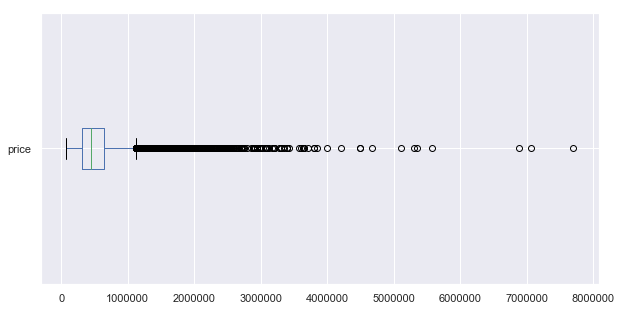

In [23]:
# House Price values
# the plot below indicates Price (target variable) have a of values are > $1 mm but only a dozen values >$4mm out of 21613.

plt.figure(figsize=(10,5))
city.boxplot(column=['price'] ,vert=False) 

In [24]:
# k=1
# plt.figure(figsize=(15,20))

# for col in city.columns[2:22]: 
#     plt.subplot(5,4,k)
#     sns.boxplot(city[col],color='blue')
#     k=k+1

* From the box plot we can say that we have a more no of outliers in the data set Total_area ,long, living_measures15 , lot_measure15,basement, ceil_measure, quality, lot_measure, living meausre , room bath and room bed.

* Furnished , yr_renovated and coast columns are having 0 ot 1 value

* No outliers in ceil,yr_built and Zipcode columns

In [25]:
 # making a copy 
# room_bed & room_bath show minimum reading of 0, which is not feasible for a house.

city1 = city.copy()
city1.drop(city1[city1['room_bed'] == 0 ].index, inplace = True) # droping the room_bed with 0 value
city1.drop(city1[city1['room_bath'] == 0 ].index, inplace = True) #droping the room_bath with 0 value

In [26]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
city1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cid,21597.00000,4580474287.77099,2876735715.74778,1000102.00000,2123049175.00000,3904930410.00000,7308900490.00000,9900000190.00000
price,21597.00000,540296.57351,367368.14010,78000.00000,322000.00000,450000.00000,645000.00000,7700000.00000
room_bed,21597.00000,3.37320,0.92630,1.00000,3.00000,3.00000,4.00000,33.00000
room_bath,21597.00000,2.11583,0.76898,0.50000,1.75000,2.25000,2.50000,8.00000
living_measure,21597.00000,2080.32185,918.10613,370.00000,1430.00000,1910.00000,2550.00000,13540.00000
lot_measure,21597.00000,15099.40876,41412.63688,520.00000,5040.00000,7618.00000,10685.00000,1651359.00000
ceil,21597.00000,1.49410,0.53968,1.00000,1.00000,1.50000,2.00000,3.50000
coast,21597.00000,0.00755,0.08655,0.00000,0.00000,0.00000,0.00000,1.00000
sight,21597.00000,0.23429,0.76639,0.00000,0.00000,0.00000,0.00000,4.00000
condition,21597.00000,3.40983,0.65055,1.00000,3.00000,3.00000,4.00000,5.00000


In [27]:
# 0 represent houses are not furnished and 1 represent houses are furnished
city1['furnished'].value_counts()

0    17347
1     4250
Name: furnished, dtype: int64

* So, 4250 houses are Furnished and 17347 houses are not furnished

In [28]:
# coast - 0 = donot have waterfront view, 1  = waterfront view
city1.coast.value_counts()

0    21434
1      163
Name: coast, dtype: int64

* So, 163 houses are having waterfront view and 21434 houses don't have waterfront view.

In [29]:
# visualation of skewness

# k=1
# plt.figure(figsize=(20,30))

# for col in city1.columns[2:22]: 
#     plt.subplot(5,4,k)
#     sns.distplot(city1[col],color='blue')
#     k=k+1

* price , room_bed , living_measure , lot_measure ,sight , condition , quality , ceil_measure , basement , zipcode , long ,living_measure15 , lot_measure15 , total_area: are Right-Skewed.

* room_bath , yr_built , lat  : are Left-Skewed.

* ceil: it's almost Normal Distributed.

* Max room_bed value of 33
* A lot of houses don't have basement (reads 0)

#### outlier treatment

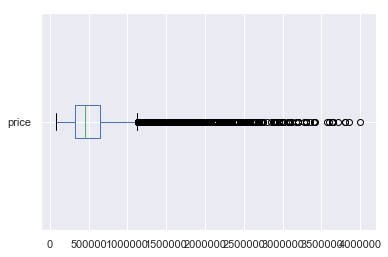

In [30]:
city_new=city1.copy()

city_new.drop(city_new[city_new['price'] > 4000000].index, inplace = True) # only 12 values are > $4mm.

city_new.boxplot(column=['price'] , vert=False)

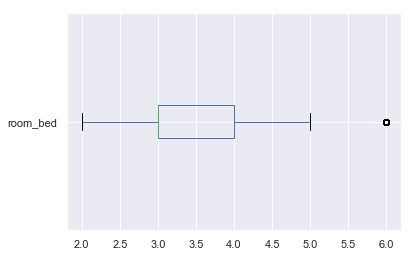

In [31]:
#outlier treatment for column 2 Room_bed DISCRETE VALUE replacing outliers with 99th and 5th percentile value as mean was giving a float value

q3 = city_new['room_bed'].quantile(0.75)
q1 = city_new['room_bed'].quantile(0.25)
t = q3-q1
outliers_above = q3+(t*1.5)
outliers_below = q1-(t*1.5)


city_new['room_bed']=np.where(city_new.room_bed > outliers_above,np.percentile(city_new.room_bed,99),city_new.room_bed)
city_new['room_bed']=np.where(city_new.room_bed < outliers_below,np.percentile(city_new.room_bed,5),city_new.room_bed)

city_new.boxplot(column=['room_bed'] , vert=False)

In [32]:
#oulier treatment for column 3 room_bath
q3 = city_new['room_bath'].quantile(0.75)
q1 = city_new['room_bath'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t

print(city_new['room_bath'].loc[city_new['room_bath']>outliers_above].count())
print(city_new['room_bath'].loc[city_new['room_bath']<outliers_below].count())
mean_val = city_new['room_bath'].loc[city_new['room_bath']<=outliers_above].mean()
city_new['room_bath'] = city_new['room_bath'].mask(city_new['room_bath']>outliers_above,mean_val)


1278
75


In [33]:
#oulier treatment for column 4 living_measure
q3 = city_new['living_measure'].quantile(0.75)
q1 = city_new['living_measure'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t

print(city_new['living_measure'].loc[city['living_measure']>outliers_above].count())
print(city_new['living_measure'].loc[city['living_measure']<outliers_below].count())
median_val = city_new['living_measure'].loc[city_new['living_measure']<=outliers_above].median()
city_new['living_measure'] = city_new['living_measure'].mask(city_new['living_measure']>outliers_above,median_val)

1218
0


2867
0


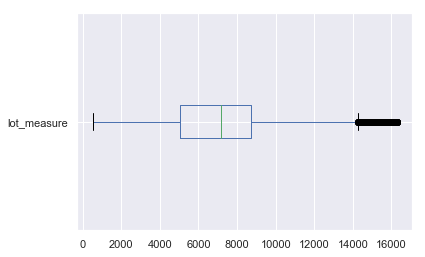

In [34]:
#oulier treatment for column 5 lot_measure CONTINOUS VALUE- REPLACING WITH MEDIAN 
q3 = city_new['lot_measure'].quantile(0.75)
q1 = city_new['lot_measure'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t

print(city_new['lot_measure'].loc[city_new['lot_measure']>outliers_above].count())
print(city_new['lot_measure'].loc[city_new['lot_measure']<outliers_below].count())
median_val = city_new['lot_measure'].loc[city_new['lot_measure']<=outliers_above].median()
city_new['lot_measure'] = city_new['lot_measure'].mask(city_new['lot_measure']>outliers_above,median_val)

city_new.boxplot(column=['lot_measure'] , vert=False)

In [35]:
#oulier treatment for column 11 ceil_measure
q3 = city_new['ceil_measure'].quantile(0.75)
q1 = city_new['ceil_measure'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t

print(city_new['ceil_measure'].loc[city_new['ceil_measure']>outliers_above].count())
print(city_new['ceil_measure'].loc[city_new['ceil_measure']<outliers_below].count())
median_val = city_new['ceil_measure'].loc[city_new['ceil_measure']<=outliers_above].median()
city_new['ceil_measure'] = city_new['ceil_measure'].mask(city_new['ceil_measure']>outliers_above,median_val)

1360
0


In [36]:
#oulier treatment for column 14 living_measure
q3 = city_new['living_measure15'].quantile(0.75)
q1 = city_new['living_measure15'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t

print(city_new['living_measure15'].loc[city_new['living_measure15']>outliers_above].count())
print(city_new['living_measure15'].loc[city_new['living_measure15']<outliers_below].count())
median_val = city_new['living_measure15'].loc[city_new['living_measure15']<=outliers_above].median()
city_new['living_measure15'] = city_new['living_measure15'].mask(city_new['living_measure15']>outliers_above,median_val)


1195
3


2613
0


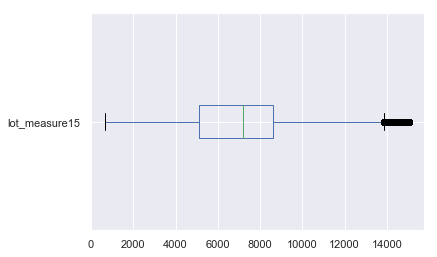

In [37]:
#oulier treatment for column 15 lot_measure15
q3 = city_new['lot_measure15'].quantile(0.75)
q1 = city_new['lot_measure15'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t

print(city_new['lot_measure15'].loc[city_new['lot_measure15']>outliers_above].count())
print(city_new['lot_measure15'].loc[city_new['lot_measure15']<outliers_below].count())
median_val = city_new['lot_measure15'].loc[city_new['lot_measure15']<=outliers_above].median()
city_new['lot_measure15'] = city_new['lot_measure15'].mask(city_new['lot_measure15']>outliers_above,median_val)

city_new.boxplot(column=['lot_measure15'] , vert=False)

2880
0


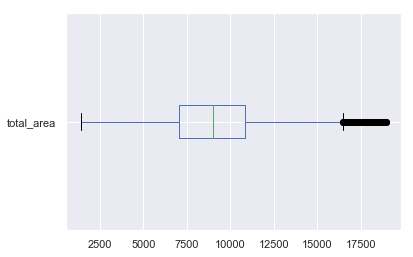

In [38]:
#oulier treatment for column 16 total_area
q3 = city_new['total_area'].quantile(0.75)
q1 = city_new['total_area'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t

print(city_new['total_area'].loc[city_new['total_area']>outliers_above].count())
print(city_new['total_area'].loc[city_new['total_area']<outliers_below].count())
median_val = city_new['total_area'].loc[city_new['total_area']<=outliers_above].median()
city_new['total_area'] = city_new['total_area'].mask(city_new['total_area']>outliers_above,median_val)

city_new.boxplot(column=['total_area'] , vert=False)

In [39]:
city_new2 = city_new.copy() #making copy of data
city_new2.head(5).T

,0,1,2,3,4
cid,3034200666,8731981640,5104530220,6145600285,8924100111
price,808100,277500,404000,300000,699000
room_bed,4.00000,4.00000,3.00000,2.00000,2.00000
room_bath,3.25000,2.50000,2.50000,1.00000,1.50000
living_measure,3020,2550,2370,820,1400
lot_measure,13457,7500,4324,3844,4050
ceil,1.00000,1.00000,2.00000,1.00000,1.00000
coast,0,0,0,0,0
sight,0,0,0,0,0
condition,5,3,3,4,4


In [40]:
# boxplots of the variables after outlier treatment
# k=1
# plt.figure(figsize=(15,20))

# for col in city_new2.columns[2:22]: 
#     plt.subplot(5,4,k)
#     sns.boxplot(city_new2[col],color='blue')
#     k=k+1

In [41]:
# visualation of skewness after outlier treatment

# k=1
# plt.figure(figsize=(20,30))

# for col in city_new2.columns[2:22]: 
#     plt.subplot(5,4,k)
#     sns.distplot(city_new2[col],color='blue')
#     k=k+1

#### Bivariate Analysis

,mean,median,size
month_year,,,
April-2015,557938.30534,476500,2227
August-2014,532010.56118,442000,1937
December-2014,524799.90204,432500,1470
February-2015,508520.05132,426500,1247
January-2015,525963.25153,438500,978
July-2014,544892.16101,465000,2211
June-2014,550845.85977,465000,2175
March-2015,544057.68320,450000,1875
May-2014,548166.60011,465000,1768


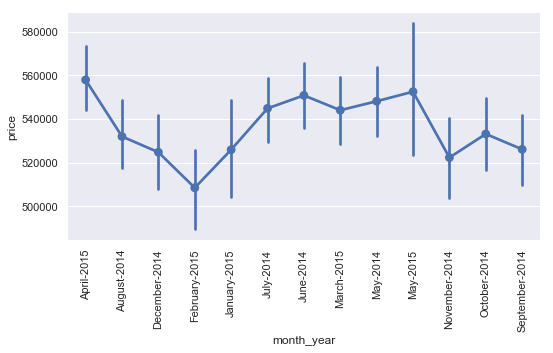

In [42]:
#month,year in which house is sold. Price is not influenced by it

city_new2.sort_values(["month_year"], axis=0, ascending=True, inplace=True) 
sns.factorplot(x='month_year',y='price',data=city_new2, size=4, aspect=2)
plt.xticks(rotation=90)
#groupby
city_new2.groupby('month_year')['price'].agg(['mean','median','size'])

* The mean price of the houses tend to be high during April, May 

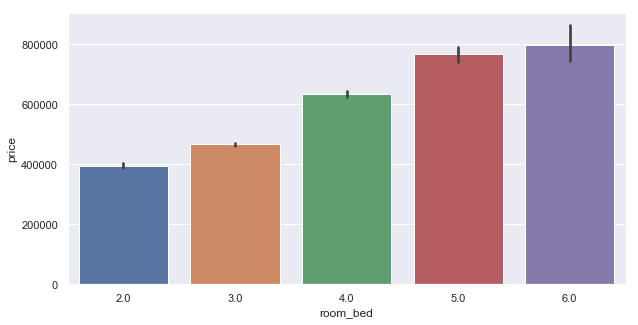

In [43]:
plt.figure(figsize = (10,5))
sns.barplot( x="room_bed", y="price", data=city_new2);

* Higher number of rooms draw higher price.

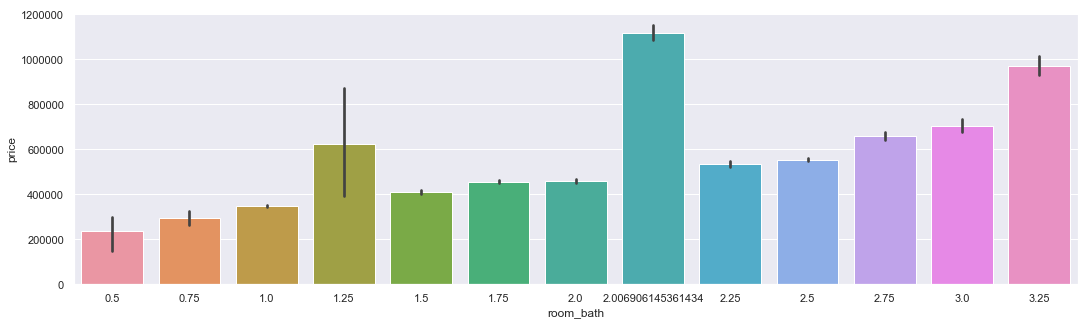

In [44]:
plt.figure(figsize = (18,5))
sns.barplot( x="room_bath", y="price", data=city_new2);

* Number of bath rooms have a positive correlation with price

In [45]:
# pairplot Price VS different measures.
# sns.pairplot(city_new2, y_vars='price', x_vars=['living_measure', 'lot_measure', 'total_area' ,'ceil_measure','basement','yr_built'])                                                       
# plt.show()


* living_measure shows positive correlation with price
* We may either chose 'lot_measure' or 'total_area' owing to their high inter-correlation and simialr response to 'price'
* 'ceil_measure' is positively correlated with house price.
* basement' is positively correlated with house price but data cloud shows larger scatter.
* Price shows a gradual increase in recent years.

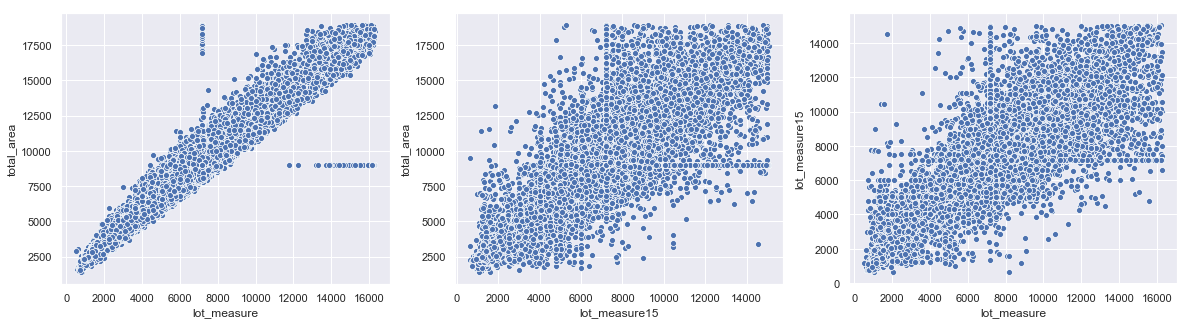

In [46]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
sns.scatterplot(city_new2['lot_measure'],city_new2['total_area'])

plt.subplot(1, 3, 2)
sns.scatterplot(city_new2['lot_measure15'],city_new2['total_area'])

plt.subplot(1, 3, 3)
sns.scatterplot(city_new2['lot_measure'],city_new2['lot_measure15'])

plt.show()

* We can drop lot_measure15 if lot_measure15 has strong correlation with lot_measure
* lot_measure has better correlation with total area with lesser spread.

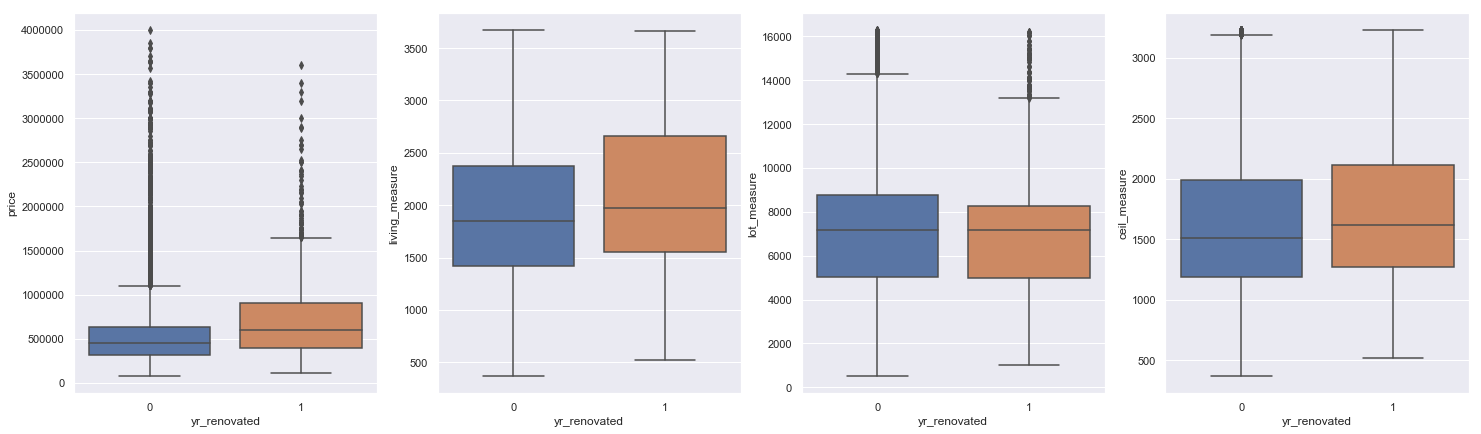

In [47]:
#boxplot to show yr_renovated vs Price , living_measure , lot_measure , ceil_measure
plt.figure(figsize=(25,7))
plt.subplot(1, 4, 1)
sns.boxplot(city_new2['yr_renovated'],city_new2['price'])

plt.subplot(1, 4, 2)
sns.boxplot(city_new2['yr_renovated'],city_new2['living_measure'])

plt.subplot(1, 4, 3)
sns.boxplot(city_new2['yr_renovated'],city_new2['lot_measure'])

plt.subplot(1, 4, 4)
sns.boxplot(city_new2['yr_renovated'],city_new2['ceil_measure'])

plt.show()

* renovated houses have high price

* yr_renovated doesn't have any observable correlation with other independent variables related to area measure.

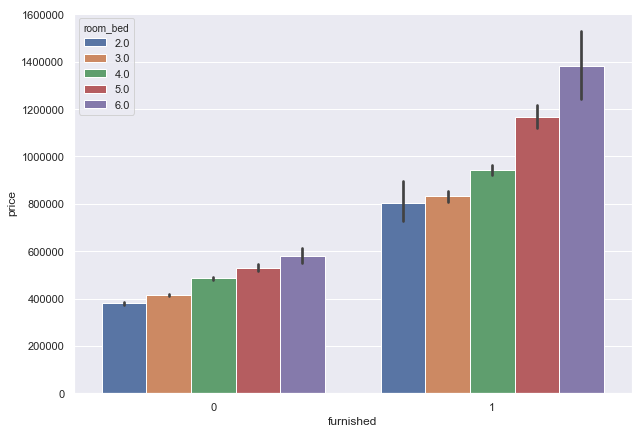

In [48]:
# Furnished vs. Price
plt.figure(figsize = (10,7))
sns.barplot( x="furnished", y="price", data=city_new2, hue='room_bed');

* Furnished Plots are priced above $800,000, with minimum no. of bedroom/house.

* Also as the no. of bedroom/house increases, the price of house increases as well, signifying positive correlation with price.

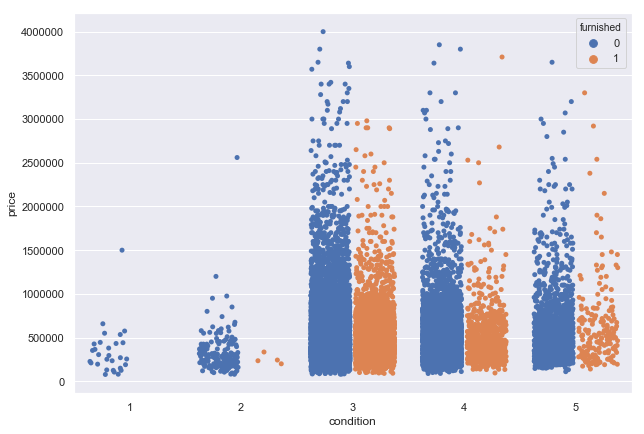

In [49]:
# Condition vs. Price
plt.figure(figsize = (10,7))

sns.stripplot(city_new2['condition'],city_new['price'],hue=city_new2['furnished'],jitter=0.35,dodge=True);

* Houses with condition 1-2 have negligiable furnished houses thus they have low prices.

* Houses with condition 3-4-5 have higher number of furnished house and thus are in the higher price slab.

* Both furnished and unfurnished houses in any of the individual 3-4-5 conditions fall in the same price range for a specific "condition" category.

* Furnished houses starting prices are higher than unfurnished ones but higher end of house price is not impacted by furnishing status.

* Overall, furnished flats have better condition thus have higher price.

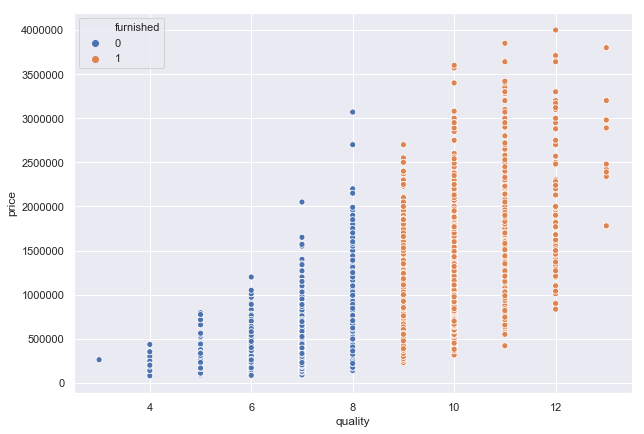

In [50]:
# Quality vs Price
plt.figure(figsize = (10,7))
sns.scatterplot(city_new2['quality'],city_new2['price'],hue=city_new2['furnished']);

* Houses with quality higher than 8 are funished
* Price of houses increases with Quality and the rate of increase of house price vs. quality is higher for higher price range.

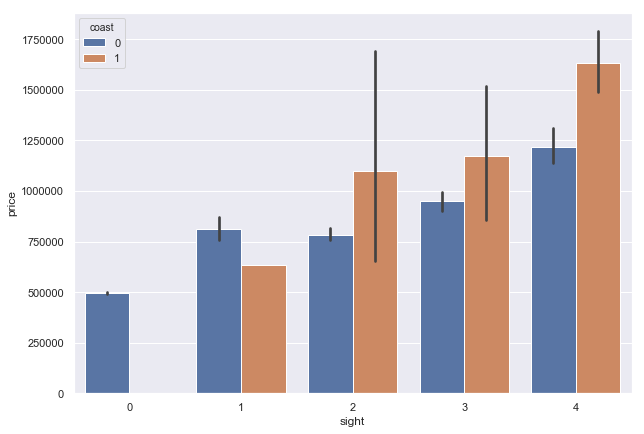

In [51]:
# Sight vs. Price
plt.figure(figsize = (10,7))
sns.barplot( x="sight", y="price", data=city_new2, hue='coast');

* Houses in the vicinity of a waterfront are slighlty more higher priced, especially for #visits > = 2.

<Figure size 1080x1800 with 0 Axes>

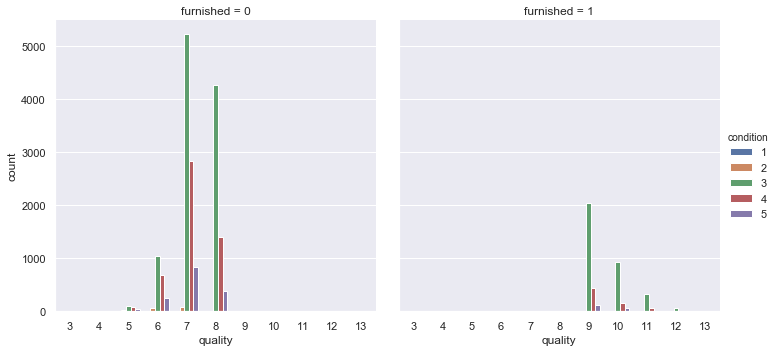

In [52]:
# quality Vs furnished
plt.figure(figsize = (15,25))

sns.catplot(x="quality", hue="condition", col="furnished",data=city_new2, kind="count");

* Count of Non-Furnished Houses are significantly high and are average graded.

* Furnished houses are less in count but are high graded.

In [53]:
# # house_age vs. Price
# sns.factorplot( x="house_age", y="price", data=city_new2, hue='yr_renovated' , size=15, aspect=2);

* House age between 26 - 77 yrs are having higher price for renovated houses.

In [54]:
# Effect of longtitude -latitude on house price
df_price = pd.read_csv('Price_Class.csv')

* Loaded a new file with 4 price classes: class 1 : <$240000, class 2 : 240000-480000, class 3 : 480000-750000 & class 4 : >750000

In [55]:
df_price = df_price.drop (['cid'], axis =1)
city_price = city_new2. copy()
city_price = city_price.join(df_price)

In [56]:
# plt.figure(figsize= (20,15))
# sns.scatterplot(x='lat', y='long', data=city_price, hue='price_class')

* Location based on latitude-longitude don't have a clear bearing on house price as classes
* Classes 2 (240000-480000) & 4 (>750000) have a lot of overlap across.

In [57]:
city_NEW = city_new2.copy()
city_NEW = city_NEW.drop(['cid'] , axis =1) 

In [58]:
city_NEW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21586 entries, 8596 to 17304
Data columns (total 24 columns):
price               21586 non-null int64
room_bed            21586 non-null float64
room_bath           21586 non-null float64
living_measure      21586 non-null int64
lot_measure         21586 non-null int64
ceil                21586 non-null float64
coast               21586 non-null int64
sight               21586 non-null int64
condition           21586 non-null int64
quality             21586 non-null int64
ceil_measure        21586 non-null int64
basement            21586 non-null int64
yr_built            21586 non-null int64
yr_renovated        21586 non-null int64
zipcode             21586 non-null int64
lat                 21586 non-null float64
long                21586 non-null float64
living_measure15    21586 non-null int64
lot_measure15       21586 non-null int64
furnished           21586 non-null int64
total_area          21586 non-null int64
month_year       

In [59]:
# # pairplot
# sns.pairplot(city_NEW , diag_kind = 'kde')

In [60]:
#heatmap
# plt.figure(figsize = (20,15))
# sns.heatmap(city_NEW.corr(),annot=True);

#### Based on the data analysis and observations, following recommendations can be made for inputs into regression modelling exercise:
1. Zipcode be dropped as it don't add clarity in house price segmentation.

2. We can drop continuous numeric variables that correlated < 0.1 with house price, e.g., lot_measure15
3. Living_measure15 might be dropped as well as this doesn't add any additional value as compared to iving_measure.

4. CID can be dropped.

In [61]:
corr = city_NEW.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr.price)

price               1.00000
quality             0.67788
furnished           0.58199
living_measure      0.39967
sight               0.39653
living_measure15    0.36929
ceil_measure        0.32807
room_bath           0.32302
lat                 0.31952
room_bed            0.31932
basement            0.31288
ceil                0.26389
coast               0.24833
total_area          0.14509
yr_renovated        0.12279
lot_measure         0.06922
lot_measure15       0.06062
yr_built            0.05448
condition           0.04015
long                0.02436
house_sold_year     0.00520
zipcode            -0.05155
house_age          -0.05439
Name: price, dtype: float64


### Modelling

In [62]:
# copying the dataset before removing outliers
Houseprice_df=city_NEW.copy()

In [63]:
Houseprice_df.dtypes

price                 int64
room_bed            float64
room_bath           float64
living_measure        int64
lot_measure           int64
ceil                float64
coast                 int64
sight                 int64
condition             int64
quality               int64
ceil_measure          int64
basement              int64
yr_built              int64
yr_renovated          int64
zipcode               int64
lat                 float64
long                float64
living_measure15      int64
lot_measure15         int64
furnished             int64
total_area            int64
month_year           object
house_sold_year       int64
house_age             int64
dtype: object

In [64]:
Houseprice_df.drop('month_year', axis=1 ,inplace=True)
Houseprice_df.drop('house_sold_year', axis=1 ,inplace=True)
Houseprice_df.drop('zipcode', axis=1 ,inplace=True)
Houseprice_df.head(5)

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,...,basement,yr_built,yr_renovated,lat,long,living_measure15,lot_measure15,furnished,total_area,house_age
8596,967000,4.00000,2.50000,3100,7250,2.00000,0,0,3,9,...,0,2010,0,47.69610,-122.31600,1240,6670,1,10350,5
2652,1270000,4.00000,3.00000,3130,2646,2.50000,0,0,5,9,...,840,1906,0,47.62720,-122.31600,2920,4500,1,5776,109
19828,329950,4.00000,1.00000,2050,7590,1.00000,0,0,3,7,...,770,1957,0,47.49160,-122.22400,2050,7800,0,9640,58
2654,412000,3.00000,1.50000,1320,8000,1.00000,0,0,3,7,...,0,1957,0,47.60270,-122.12200,1720,8100,0,9320,58
6518,360000,5.00000,3.00000,2480,7200,1.00000,0,0,3,7,...,920,1999,0,47.45860,-122.28300,1910,9432,0,9680,16


In [65]:
Houseprice_df.shape

(21586, 21)

In [66]:
#Dropping the target variable and assigning to y-target
X=Houseprice_df.drop('price',axis=1)
y=Houseprice_df['price']
# X.head(10)

In [67]:
#shape of training set
print(X.shape)
print(y.shape)

(21586, 20)
(21586,)


In [68]:
 #Splitting the data into 60:40, train:test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=10)
#Splitting the test data into 20:20   validation:test
X_val,X_test,y_val,y_test=train_test_split(X_test, y_test,test_size=0.5,random_state=10)

In [69]:
# Mean_absolute_percentage_error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Linear Regression

* Linear Regression is a supervised learning technique which helps in finding the correlation between variables and enables us to predict the continuous output variable based on the one or more predictor variables.

In [70]:
# Created a linear model
LR_model=LinearRegression()
LR_model.fit(X_train,y_train)
# X_test.head()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
y_pred = LR_model.predict(X_test)
print('Performance on training data using Linear Regression:',LR_model.score(X_train,y_train))
print('Performance on testing data using Linear Regression:',LR_model.score(X_test,y_test))
R2_LR=metrics.r2_score(y_test, y_pred)
print('R2 LR: ',R2_LR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
MAPE_LR=mean_absolute_percentage_error(y_test,y_pred)
print('MAPE:',MAPE_LR)

Performance on training data using Linear Regression: 0.651767372661981
Performance on testing data using Linear Regression: 0.6585240057577098
R2 LR:  0.6585240057577098
MSE:  42461053388.21358
MAE: 129137.16645658472
MAPE: 26.126553972891287


### Lasso Regression

* Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. 

In [72]:
#created a Lasso Regression model
from sklearn import linear_model
las_model=linear_model.Lasso(alpha=0.1)
las_model.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
y_pred = las_model.predict(X_test)
print('Performance on training data using Lasso Regression:',las_model.score(X_train,y_train))
print('Performance on testing data using Lasso Regression:',las_model.score(X_test,y_test))
R2_las=metrics.r2_score(y_test, y_pred)
print('R2 las: ',R2_las)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
MAPE_las=mean_absolute_percentage_error(y_test,y_pred)
print('MAPE:',MAPE_las)

Performance on training data using Lasso Regression: 0.6509413693412288
Performance on testing data using Lasso Regression: 0.6571015342329993
R2 las:  0.6571015342329993
MSE:  42637931530.0811
MAE: 129428.67646179537
MAPE: 26.13646908059516


### Ridge Regression

* Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity.

In [74]:
#created a Ridge regression model
from sklearn.linear_model import Ridge
rid_model=linear_model.Ridge(alpha=0.1)
rid_model.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [75]:
y_pred = rid_model.predict(X_test)
print('Performance on training data using Ridge Regression:',rid_model.score(X_train,y_train))
print('Performance on testing data using Ridge Regression:',rid_model.score(X_test,y_test))
R2_rid=metrics.r2_score(y_test, y_pred)
print('R2 rid: ',R2_rid)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
MAPE_rid=mean_absolute_percentage_error(y_test,y_pred)
print('MAPE:',MAPE_rid)

Performance on training data using Ridge Regression: 0.6517673399063245
Performance on testing data using Ridge Regression: 0.6585253918389942
R2 rid:  0.6585253918389942
MSE:  42460881035.03968
MAE: 129134.59631778693
MAPE: 26.125742259731577


### Ada Boosting

* Boosting" in machine learning is a way of combining multiple simple models into a single composite model.
* Ada-boosting model combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method.

In [76]:
#Created an ada-boosting model
AD_model=AdaBoostRegressor()
AD_model.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [77]:
y_pred = AD_model.predict(X_test)
print('Performance on training data using Ada-boosting:',AD_model.score(X_train,y_train))
print('Performance on testing data using Ada-boosting:',AD_model.score(X_test,y_test))
R2_AD=metrics.r2_score(y_test, y_pred)
print('R2 AD: ',R2_AD)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
MAPE_AD=mean_absolute_percentage_error(y_test,y_pred)
print('MAPE:',MAPE_AD)

Performance on training data using Ada-boosting: 0.24817912578867515
Performance on testing data using Ada-boosting: 0.27247404276428144
R2 AD:  0.27247404276428144
MSE:  90464685753.5125
MAE: 266520.9238416314
MAPE: 67.38882982447721


### Gradient Boosting

* A Gradient Boosting combines the predictions from multiple decision trees to generate the final predictions. 

In [78]:
#Created a Gradient boosting model
GB_model=GradientBoostingRegressor()
GB_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [79]:
y_pred = GB_model.predict(X_test)
print('Performance on training data using Gradient-boosting:',GB_model.score(X_train,y_train))
print('Performance on testing data using Gradient-boosting:',GB_model.score(X_test,y_test))
R2_GB=metrics.r2_score(y_test, y_pred)
print('R2 GB: ',R2_GB)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
MAPE_GB=mean_absolute_percentage_error(y_test,y_pred)
print('MAPE:',MAPE_GB)

Performance on training data using Gradient-boosting: 0.8699832133267579
Performance on testing data using Gradient-boosting: 0.8479868751278478
R2 GB:  0.8479868751278478
MSE:  18902170342.09972
MAE: 80838.52440853951
MAPE: 15.480022282635558


### Random Forest

* Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean/average prediction of the individual trees

In [80]:
#created a Random forest model
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor()
RF_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [82]:
y_pred = RF_model.predict(X_test)
print('Performance on training data using Random Forest:',RF_model.score(X_train,y_train))
print('Performance on testing data using Random Forest:',RF_model.score(X_test,y_test))
R2_RF=metrics.r2_score(y_test, y_pred)
print('R2 RF: ',R2_RF)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
MAPE_RF=mean_absolute_percentage_error(y_test,y_pred)
print('MAPE:',MAPE_RF)



Performance on training data using Random Forest: 0.9726919803723207
Performance on testing data using Random Forest: 0.8535000609061787
R2 RF:  0.8535000609061787
MSE:  18216629690.28233
MAE: 76272.20276031672
MAPE: 14.45421957666576


### KNN Regressor

* KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood.

In [83]:
#created a KNN Regressor model
from sklearn.neighbors import KNeighborsRegressor
KNN_model=KNeighborsRegressor()
KNN_model.fit(X_train,y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [84]:
y_pred = KNN_model.predict(X_test)
print('Performance on training data using KNN Regressor:',KNN_model.score(X_train,y_train))
print('Performance on testing data using KNN Regressor:',KNN_model.score(X_test,y_test))
R2_KNN=metrics.r2_score(y_test, y_pred)
print('R2 RF: ',R2_KNN)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
MAPE_KNN=mean_absolute_percentage_error(y_test,y_pred)
print('MAPE:',MAPE_KNN)

Performance on training data using KNN Regressor: 0.6489665011205428
Performance on testing data using KNN Regressor: 0.4414166052136663
R2 RF:  0.4414166052136663
MSE:  69457413545.04482
MAE: 161799.78800370538
MAPE: 32.242068704301516


### Support vector regressor

* Support vector regressor classifies the new point depending on whether it lies on the positive or negative side of the hyperplane depending on the classes to predict.

In [85]:
#created a SVM Regressor model
from sklearn.svm import SVR
SVM_model=SVR()
SVM_model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
y_pred = SVM_model.predict(X_test)
print('Performance on training data using Support vector regressor:',SVM_model.score(X_train,y_train))
print('Performance on testing data using Support vector regressor:',SVM_model.score(X_test,y_test))
R2_SVM=metrics.r2_score(y_test, y_pred)
print('R2 SVM: ',R2_SVM)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
MAPE_SVM=mean_absolute_percentage_error(y_test,y_pred)
print('MAPE:',MAPE_SVM)

Performance on training data using Support vector regressor: -0.06149523541760704
Performance on testing data using Support vector regressor: -0.05448203593056622
R2 SVM:  -0.05448203593056622
MSE:  131120250850.75455
MAE: 218548.83237869755
MAPE: 42.98588424711342


In [87]:
result = pd.DataFrame({'TrainTest' : ['Linear Regression', 'Random Forest','Gardient Boost','Ada Boost','Lasso','Ridge','SVM Regression', 'KNN Regression'], 
                       'R2 Score' : [R2_LR,R2_RF,R2_GB,R2_AD,R2_las,R2_rid,R2_SVM,R2_KNN], 'Mean Absolute Percentage Error' : [MAPE_LR,MAPE_RF,MAPE_GB,MAPE_AD,MAPE_las,MAPE_rid,MAPE_SVM,MAPE_KNN],
                      })
result



,TrainTest,R2 Score,Mean Absolute Percentage Error
0,Linear Regression,0.65852,26.12655
1,Random Forest,0.85350,14.45422
2,Gardient Boost,0.84799,15.48002
3,Ada Boost,0.27247,67.38883
4,Lasso,0.65710,26.13647
5,Ridge,0.65853,26.12574
6,SVM Regression,-0.05448,42.98588
7,KNN Regression,0.44142,32.24207


After analysis below is the model...
* Based on the above comparison, we can see that Gradient Boosting Regression model & Random Forest model outperforms all the other regression models. So, we will choose  **Random forest** as the best Regression Model with maximun R2 score 0.84 and low Mean absolute percentage error of 14.6

In [88]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[8.67439399e-01 7.35614575e-02 3.22560966e-02 1.24163750e-02
 7.69783314e-03 4.26784869e-03 2.31349714e-03 4.74008112e-05
 2.95576807e-08 1.73604983e-08 1.46920919e-08 1.22413613e-08
 6.15241894e-09 3.86021414e-09 3.63761643e-09 1.79718633e-09
 1.16932241e-09 5.78788221e-10 4.72562144e-10 1.99865647e-10]


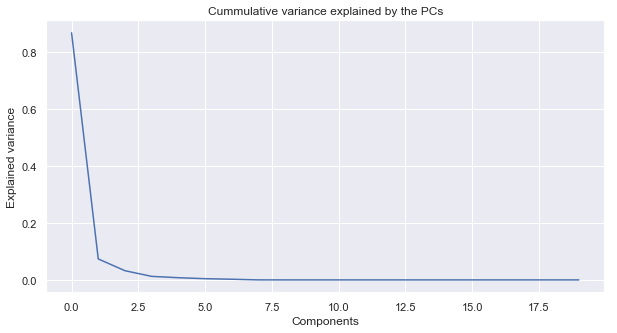

In [89]:
print(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.plot(pca.explained_variance_ratio_)
plt.title('Cummulative variance explained by the PCs')
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.show()

### Hyperparameter Tuning

In [93]:
# Build the pipline for random forest regressor
pipe_rf = Pipeline([('scaler',StandardScaler()),('RFR',RandomForestRegressor())])

param_grid = {'RFR__n_estimators': [100,200,400] }

grid = GridSearchCV(pipe_rf, param_grid=param_grid, cv=3,  verbose=2)
grid.fit(X_train,y_train)

y_pred = grid.predict(X_test)
print('Performance on training data using Grid Search Random Forest:',grid.score(X_train,y_train))
print('Performance on testing data using Grid Search Random Forest:',grid.score(X_val,y_val))
R2_GSRF=metrics.r2_score(y_test, y_pred)
print('R2 Grid search RF: ',R2_GSRF)
print('MSE Grid search: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE Grid search:',metrics.mean_absolute_error(y_test,y_pred))
MAPE_GSRF=mean_absolute_percentage_error(y_test,y_pred)
print('MAPE Grid search:',MAPE_GSRF)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ RFR__n_estimators=100, total=   8.0s
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s


[CV] ............................ RFR__n_estimators=100, total=   7.3s
[CV] RFR__n_estimators=100 ...........................................
[CV] ............................ RFR__n_estimators=100, total=   7.3s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  15.2s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  14.8s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  14.8s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  30.8s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  30.5s
[CV] RFR__n_estimators=400 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.7min finished


Performance on training data using Grid Search Random Forest: 0.9803367592536436
Performance on testing data using Grid Search Random Forest: 0.8723370606788272
R2 Grid search RF:  0.8690807950807934
MSE Grid search:  16279233220.9233
MAE Grid search: 72243.81996323529
MAPE Grid search: 13.655098271209539


In [90]:
pipe_rf = Pipeline([('scaler',StandardScaler()),('RFR',RandomForestRegressor())])

param_grid = {'RFR__n_estimators': [100,200,400] }

grid = GridSearchCV(pipe_rf, param_grid=param_grid, cv=3,  verbose=2)
grid.fit(X_train,y_train)

y_pred = grid.predict(X_test)
print('Performance on validation data using Grid Search Random Forest:',grid.score(X_val,y_val))
print('Performance on testing data using Grid Search Random Forest:',grid.score(X_test,y_test))
R2_GSRF_val=metrics.r2_score(y_test, y_pred)
print('R2 Grid search RF: ',R2_GSRF_val)
print('MSE Grid search: ',metrics.mean_squared_error(y_test, y_pred))
print('MAE Grid search:',metrics.mean_absolute_error(y_test,y_pred))
MAPE_GSRF=mean_absolute_percentage_error(y_test,y_pred)
print('MAPE Grid search:',MAPE_GSRF)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ RFR__n_estimators=100, total=   7.5s
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


[CV] ............................ RFR__n_estimators=100, total=   7.3s
[CV] RFR__n_estimators=100 ...........................................
[CV] ............................ RFR__n_estimators=100, total=   7.3s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  15.2s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  14.8s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  15.2s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  30.2s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  30.7s
[CV] RFR__n_estimators=400 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.7min finished


Performance on validation data using Grid Search Random Forest: 0.8731995092907607
Performance on testing data using Grid Search Random Forest: 0.8702178474078904
R2 Grid search RF:  0.8702178474078904
MSE Grid search:  16137845713.80676
MAE Grid search: 72091.2214175365
MAPE Grid search: 13.645457494525356


In [91]:
#feature importance from pipleline
grid.best_estimator_.named_steps['RFR'].feature_importances_

array([0.00599786, 0.00610874, 0.08381343, 0.0111248 , 0.00277381,
       0.03741917, 0.01503131, 0.00493493, 0.29255224, 0.01444513,
       0.0144386 , 0.02593854, 0.00153194, 0.17282073, 0.07613118,
       0.02230036, 0.01170073, 0.16118214, 0.01349097, 0.02626341])

In [115]:
#KFold cross validation for Random forest

def kfold_validation(x,y):
     kfold = KFold(n_splits=10, random_state=1)
     results=cross_val_score(grid, x, y, cv=kfold)
#      print(results)
     cross_k_GSrf=results.mean()
     return cross_k_GSrf
     
        
a=kfold_validation(X_train,y_train)

print("Cross validation score of Grid Search Random Forest:" , a)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ RFR__n_estimators=100, total=   7.5s
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


[CV] ............................ RFR__n_estimators=100, total=   6.9s
[CV] RFR__n_estimators=100 ...........................................
[CV] ............................ RFR__n_estimators=100, total=   6.6s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.3s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.8s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  15.1s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  26.9s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  27.2s
[CV] RFR__n_estimators=400 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.5min finished


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ RFR__n_estimators=100, total=   6.7s
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


[CV] ............................ RFR__n_estimators=100, total=   7.0s
[CV] RFR__n_estimators=100 ...........................................
[CV] ............................ RFR__n_estimators=100, total=   7.6s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.5s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.9s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.5s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  40.6s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  43.7s
[CV] RFR__n_estimators=400 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.2min finished


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ RFR__n_estimators=100, total=  10.0s
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s


[CV] ............................ RFR__n_estimators=100, total=   9.7s
[CV] RFR__n_estimators=100 ...........................................
[CV] ............................ RFR__n_estimators=100, total=   9.7s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  19.9s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  19.8s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  19.5s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  40.2s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  39.2s
[CV] RFR__n_estimators=400 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] RFR__n_estimators=100 ...........................................
[CV] ............................ RFR__n_estimators=100, total=   9.9s
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s remaining:    0.0s


[CV] ............................ RFR__n_estimators=100, total=   9.9s
[CV] RFR__n_estimators=100 ...........................................
[CV] ............................ RFR__n_estimators=100, total=   9.8s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  22.4s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  19.4s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  19.9s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  40.1s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  40.2s
[CV] RFR__n_estimators=400 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.6min finished


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ RFR__n_estimators=100, total=   9.3s
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.6s remaining:    0.0s


[CV] ............................ RFR__n_estimators=100, total=   9.6s
[CV] RFR__n_estimators=100 ...........................................
[CV] ............................ RFR__n_estimators=100, total=   7.4s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.3s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.7s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.3s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  31.4s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  27.1s
[CV] RFR__n_estimators=400 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.6min finished


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ RFR__n_estimators=100, total=   7.1s
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV] ............................ RFR__n_estimators=100, total=   7.0s
[CV] RFR__n_estimators=100 ...........................................
[CV] ............................ RFR__n_estimators=100, total=   6.7s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.4s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.5s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  14.6s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  28.4s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  26.3s
[CV] RFR__n_estimators=400 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.5min finished


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ RFR__n_estimators=100, total=   6.6s
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV] ............................ RFR__n_estimators=100, total=   6.5s
[CV] RFR__n_estimators=100 ...........................................
[CV] ............................ RFR__n_estimators=100, total=   6.5s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.5s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.7s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.1s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  26.4s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  27.0s
[CV] RFR__n_estimators=400 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.4min finished


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ RFR__n_estimators=100, total=   6.6s
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV] ............................ RFR__n_estimators=100, total=   6.5s
[CV] RFR__n_estimators=100 ...........................................
[CV] ............................ RFR__n_estimators=100, total=   6.5s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.6s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.7s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.3s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  26.4s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  26.9s
[CV] RFR__n_estimators=400 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.4min finished


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ RFR__n_estimators=100, total=   6.6s
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV] ............................ RFR__n_estimators=100, total=   7.0s
[CV] RFR__n_estimators=100 ...........................................
[CV] ............................ RFR__n_estimators=100, total=   6.5s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.2s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.2s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.2s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  27.5s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  27.4s
[CV] RFR__n_estimators=400 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.4min finished


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ RFR__n_estimators=100, total=   6.6s
[CV] RFR__n_estimators=100 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV] ............................ RFR__n_estimators=100, total=   6.6s
[CV] RFR__n_estimators=100 ...........................................
[CV] ............................ RFR__n_estimators=100, total=   6.5s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.2s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.9s
[CV] RFR__n_estimators=200 ...........................................
[CV] ............................ RFR__n_estimators=200, total=  13.2s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  26.8s
[CV] RFR__n_estimators=400 ...........................................
[CV] ............................ RFR__n_estimators=400, total=  27.4s
[CV] RFR__n_estimators=400 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.4min finished


Cross validation score of Grid Search Random Forest: 0.8556881914674911


In [116]:
result1 = pd.DataFrame({'Grid search' : ['Random Forest'], 'R2 Score_train_val' : [R2_GSRF], 'R2 Score_val_test' : [R2_GSRF_val], 'Cross val' : [a]}) 
                        
result1

,Grid search,R2 Score_train_val,R2 Score_val_test,Cross val
0,Random Forest,0.86908,0.87022,0.85569


Above is the cross validation score and percentage error of random serach algorithm

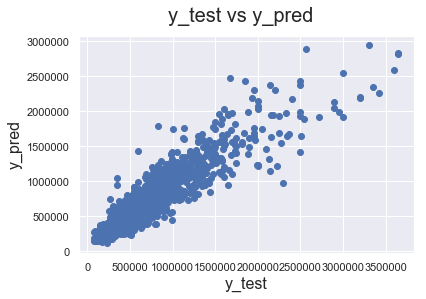

In [98]:
# Plotting y_test and y_pred to understand the spread
def prediction_graph(x,y):
     fig = plt.figure()
     plt.scatter(x,y)
     fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
     plt.xlabel('y_test', fontsize = 16)                          # X-label
     plt.ylabel('y_pred', fontsize = 16)                          # Y-label

prediction_graph(y_test, y_pred)


# Insight from graph
We are able to get almost horizontal line can be an indication of linear relationship ,thus taking Random forest regression algorithm linear regression seems to be the best option. 

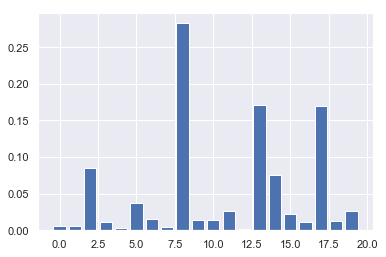

,feature,importance
8,quality,0.28290
13,lat,0.17173
17,furnished,0.17045
2,living_measure,0.08521
14,long,0.07548
5,coast,0.03736
19,house_age,0.02683
11,yr_built,0.02610
15,living_measure15,0.02240
6,sight,0.01505


In [91]:
from matplotlib import pyplot


importance = grid.best_estimator_.named_steps['RFR'].feature_importances_

# # plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

names = []
importpercent=[]
for feat, importance in zip(X.columns, grid.best_estimator_.named_steps['RFR'].feature_importances_):
    names.append(feat)
    importpercent.append(importance)

front=pd.DataFrame({'feature' : names, 'importance' : importpercent})
front.sort_values('importance',ascending=False)

#### Observation
* After Analysing variables in EDA , Price (Target Variable) have linear relationship with living_measure , living_measure15 and ceil_measure
* There is Linear relation exist between lot_ measure and total area And also there is some linear relation between ceil_measure and living_measure 
* zipcode has No clear relationship with price.
* After analysing variable and factors influencing the house price we have found Random Forest model gives best Result.
* Accuracy of the model is improved by Hyperparameter Tuning.  


In [107]:
filename = 'finalized_model1.pkl'
pickle.dump(grid, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8699153837345471


Predicted house price.

In [106]:
arr=np.asarray([2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4])
loaded_model.predict(arr.reshape(1, -1))

array([593051.68])

The main objective of this machine learning project is building a mechanism based on the given set of variables to generate an optimum prediction on the houses that gives buyers and sellers fair confidence independent of real estate agents.

We’ve used 20 variables in the exploratory data analysis after necessary data curation to analyze their impact on house price. We’ve also listed the hierarchy of parameters supposedly affecting the house price were then listed.
 
These feature set were then given as an input to the different regression modelling algorithms to predict house prices. We’ve calculated the performance of each model using different performance metrics and compared them based on these metrics Based on the above comparison, we can see that Random Forest model outperforms all the other regression models. So, we chose Random forest as the best Regression Model for this problem and have succesfully predicted the house price.